In [74]:
%load_ext autoreload
%autoreload 2
from matplotlib import pyplot as plt
import librosa
import librosa.display
import numpy as np
from moment_splitter import moment_splitter
from extract_features import extract_features
from pathlib import Path
import json
from sklearn.metrics import accuracy_score

"""
aud, SR, filename_auto = moment_splitter(sensor=4, duration=7, offset=106, highpass=8000, lowpass=1, bandstop1=[0,0], bandstop2=[0,0] )
aud, SR, filename_ovi = moment_splitter(sensor=4, duration=2, offset=1100, highpass=8000, lowpass=1, bandstop1=[0,0], bandstop2=[0,0] )
aud, SR, filename_ovi2 = moment_splitter(sensor=4, duration=3, offset=1155, highpass=8000, lowpass=1, bandstop1=[0,0], bandstop2=[0,0] )
aud, SR, filename_auto2 = moment_splitter(sensor=4, duration=22, offset=1107, highpass=8000, lowpass=1, bandstop1=[0,0], bandstop2=[0,0] )
aud, SR, filename_puhe = moment_splitter(sensor=4, duration=10, offset=104, highpass=8000, lowpass=1, bandstop1=[0,0], bandstop2=[0,0] )
aud, SR, filename_kello = moment_splitter(sensor=4, duration=2, offset=353, highpass=8000, lowpass=1, bandstop1=[0,0], bandstop2=[0,0] )
aud, SR, filename_tootti = moment_splitter(sensor=4, duration=1, offset=134, highpass=8000, lowpass=1, bandstop1=[0,0], bandstop2=[0,0] )
"""

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


ModuleNotFoundError: No module named 'accuracy_score'

In [65]:
# aud, SR, filename = moment_splitter(sensor=1, duration=5*60, offset=0, highpass=8000, lowpass=1, bandstop1=[0,0], bandstop2=[0,0] )

f = open('samples.json',)
samples = json.load(f)


In [66]:
x=[]
y=[]
for sample in samples:
    sensorid=1
    while sensorid<5:
        aud, SR, filename = moment_splitter(sensor=sensorid, duration=sample["duration"], offset=sample["offset"], highpass=8000, lowpass=1, bandstop1=[0,0], bandstop2=[0,0] )
        y.append(sample["sample"])
        x.append(extract_features(file=filename, aud=aud))
        #results.append({'sample':sample,'aud':aud,'SR':SR,'filename':filename})
        sensorid=sensorid+1


In [67]:

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
npx=np.array(x)
le.fit(np.array(y))
ny=le.transform(np.array(y))
le.classes_

array(['askeleet', 'auto', 'muu', 'ovi', 'puhe'], dtype='<U8')

In [68]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(npx,ny)


DecisionTreeClassifier()

In [73]:
yhat_test = clf.predict(npx)
# Compute accuracy based on test samples
acc = accuracy_score(ny, yhat_test)


NameError: name 'accuracy_score' is not defined

In [69]:
predy=clf.predict(npx)

In [70]:
from joblib import dump, load
import pickle
obj=pickle.dumps(clf)
dump(clf, 'clf.joblib') 
leobj=pickle.dumps(le)
dump(le,'le.joblib')

['le.joblib']

In [61]:
# Feature extraction from filtered files
f1 = extract_features(file=filename_auto)
f2 = extract_features(file=filename_ovi)
f3 = extract_features(file=filename_ovi2)
f4 = extract_features(file=filename_auto2)
f5 = extract_features(file=filename_puhe)
f6 = extract_features(file=filename_kello)
f7 = extract_features(file=filename_tootti)

Text(0, 0.5, 'Count')

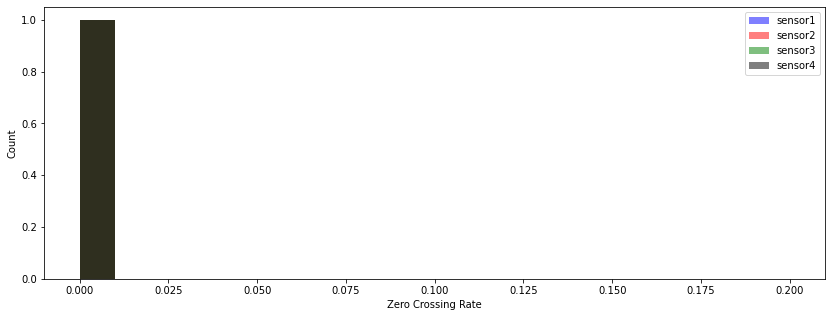

In [57]:
plt.figure(figsize=(14, 5))
plt.hist(f1[:,0], color='b', range=(0, 0.2), alpha=0.5, bins=20)
plt.hist(f2[:,0], color='r', range=(0, 0.2), alpha=0.5, bins=20)
plt.hist(f3[:,0], color='g', range=(0, 0.2), alpha=0.5, bins=20)
plt.hist(f4[:,0], color='black', range=(0, 0.2), alpha=0.5, bins=20)
plt.legend(('sensor1', 'sensor2', 'sensor3', 'sensor4'))
plt.xlabel('Zero Crossing Rate')
plt.ylabel('Count')

Text(0.5, 1.0, 'Recorded waveform')

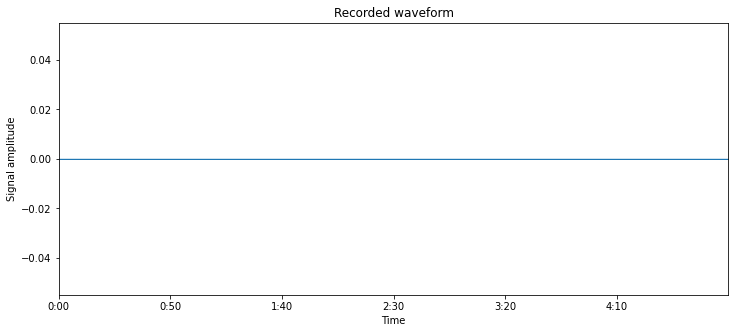

In [ ]:
plt.figure(figsize=(12,5))
librosa.display.waveplot(aud, sr=SR)
plt.ylabel("Signal amplitude")
plt.title("Recorded waveform")

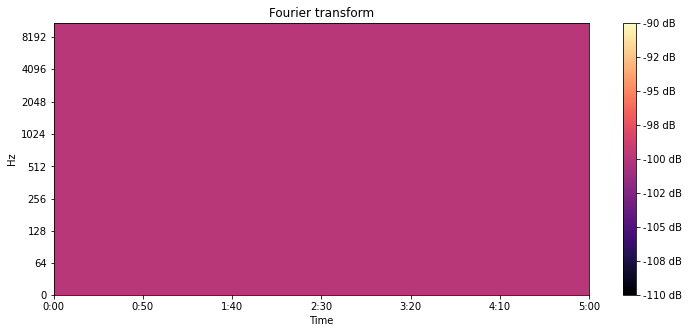

In [ ]:
X = librosa.stft(aud)
X_db = librosa.amplitude_to_db(np.abs(X))


fig, ax = plt.subplots(figsize = (12, 5))
img = librosa.display.specshow(X_db, x_axis='time', y_axis='log', ax=ax)
ax.set(title='Fourier transform')
fig.colorbar(img, ax=ax, format="%+2.f dB")
